In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [216]:
data = pd.read_csv("housing.csv")

In [217]:
data = data.dropna()

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [219]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [220]:
train_data = X_train.join(y_train)

In [221]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
2343,-119.69,36.82,15.0,3303.0,512.0,1687.0,505.0,4.8100,INLAND,93600.0
4402,-118.28,34.09,49.0,3828.0,1197.0,2862.0,1009.0,2.4677,<1H OCEAN,219200.0
472,-122.29,37.87,52.0,2225.0,460.0,1145.0,430.0,2.6165,NEAR BAY,150000.0
10643,-117.79,33.56,36.0,2057.0,329.0,658.0,309.0,7.8660,<1H OCEAN,500001.0
10732,-117.87,33.60,33.0,3120.0,602.0,1155.0,553.0,5.2949,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
3719,-118.42,34.19,34.0,2622.0,572.0,1997.0,573.0,3.3380,<1H OCEAN,222500.0
11662,-118.02,33.86,26.0,2342.0,383.0,1290.0,394.0,5.6677,<1H OCEAN,220700.0
2769,-115.98,33.32,8.0,240.0,46.0,63.0,24.0,1.4688,INLAND,53800.0
15245,-117.27,33.00,36.0,2426.0,454.0,1085.0,420.0,5.1523,NEAR OCEAN,387800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

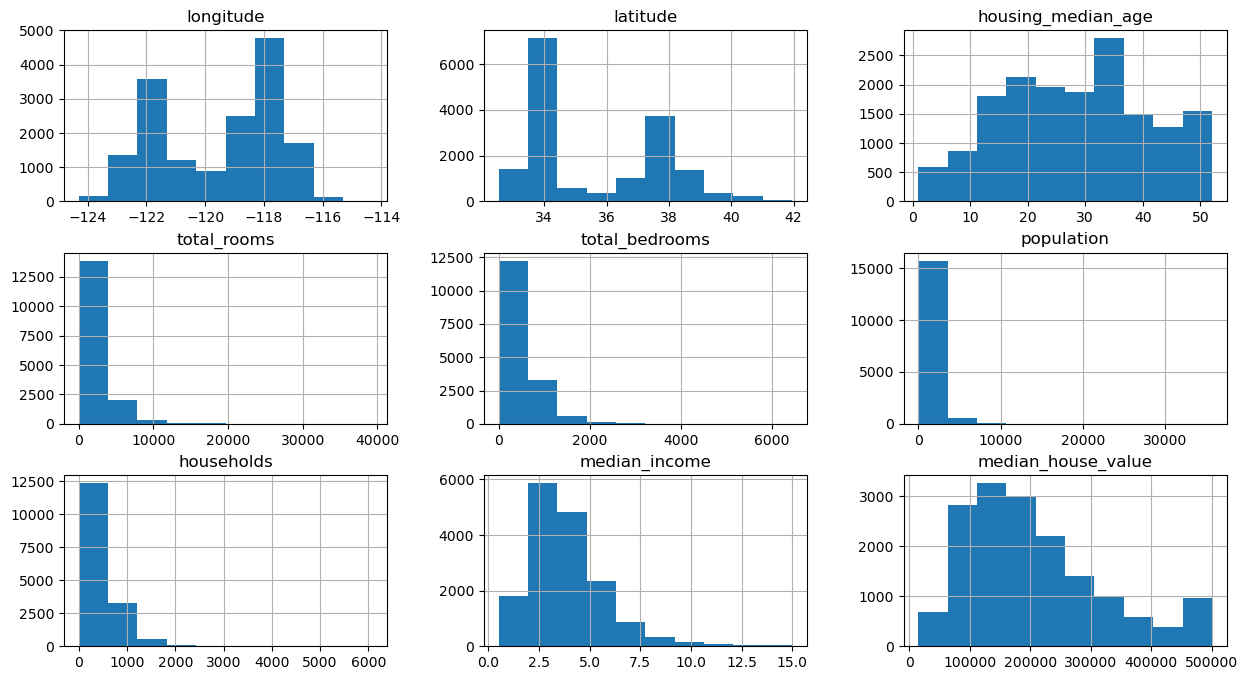

In [222]:
train_data.hist(figsize=(15,8))

<Axes: >

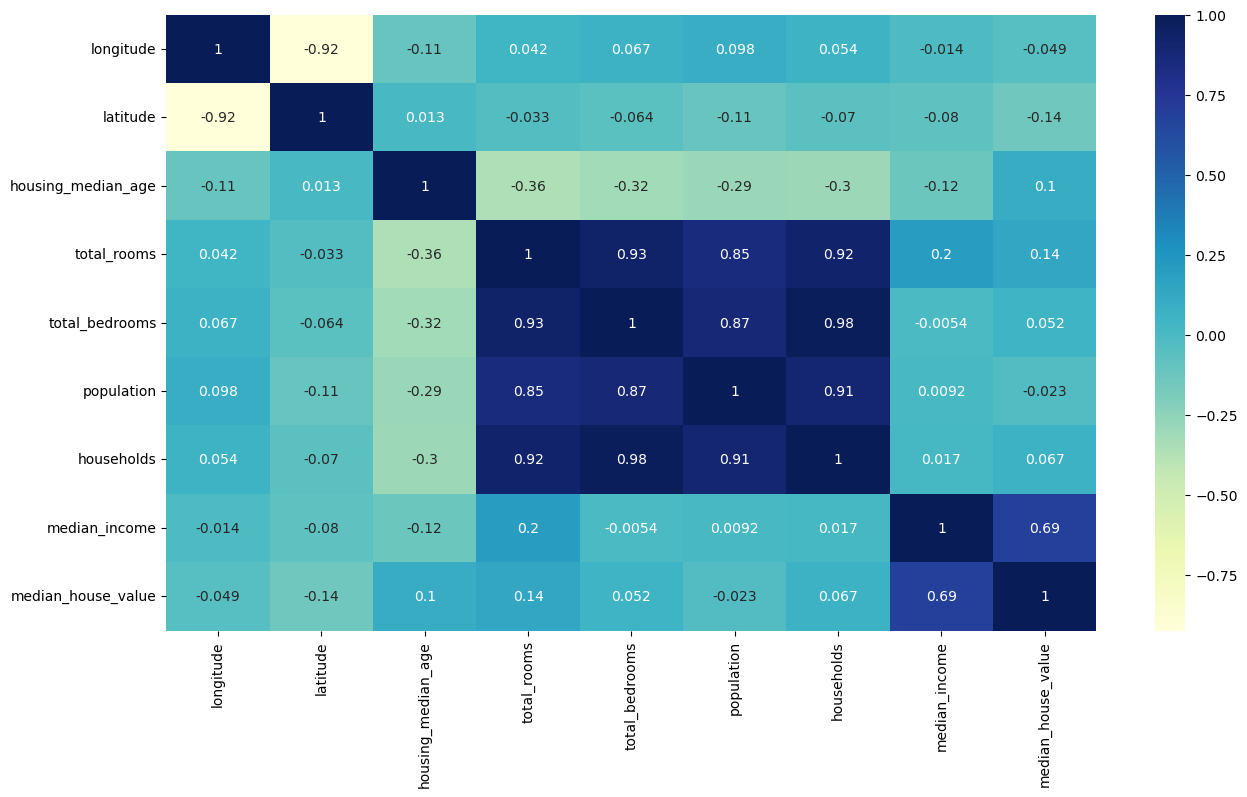

In [223]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [224]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

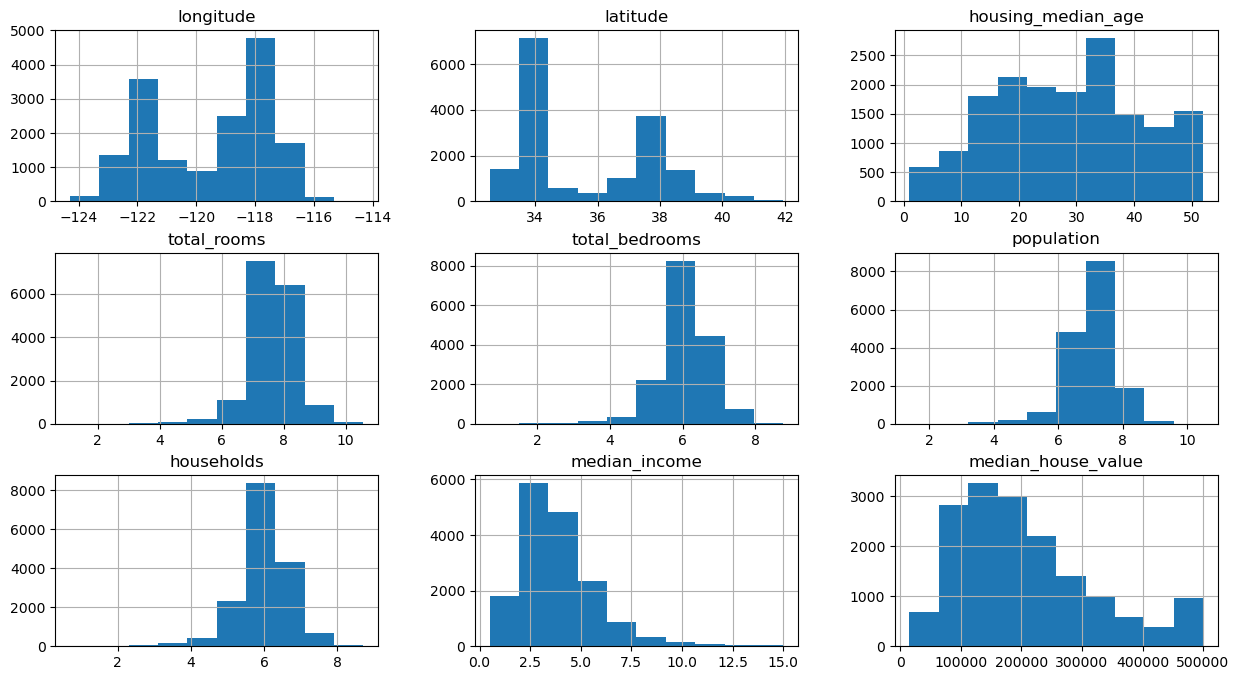

In [225]:
train_data.hist(figsize=(15,8))

In [226]:
train_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     7278
INLAND        5202
NEAR OCEAN    2062
NEAR BAY      1801
ISLAND           3
Name: count, dtype: int64

In [227]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'], dtype = int)).drop(['ocean_proximity'],axis=1)

<Axes: >

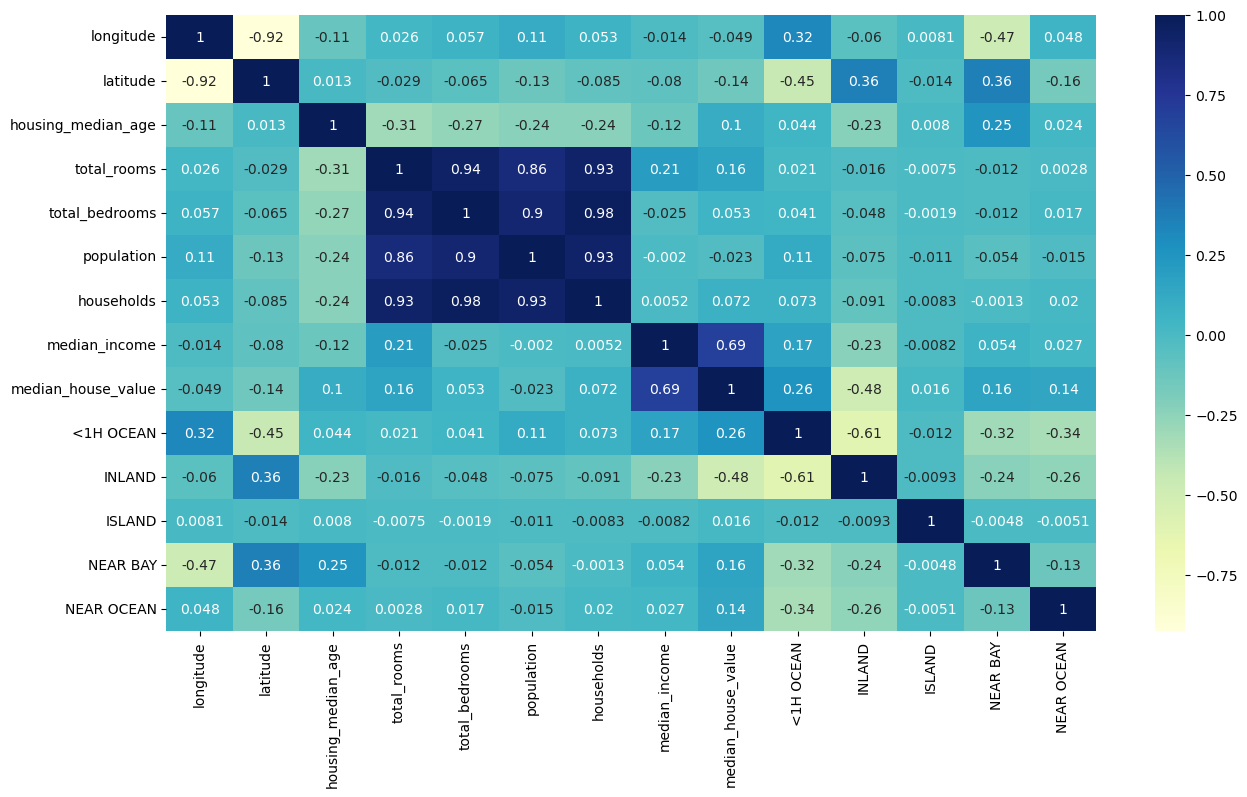

In [228]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<Axes: xlabel='longitude', ylabel='latitude'>

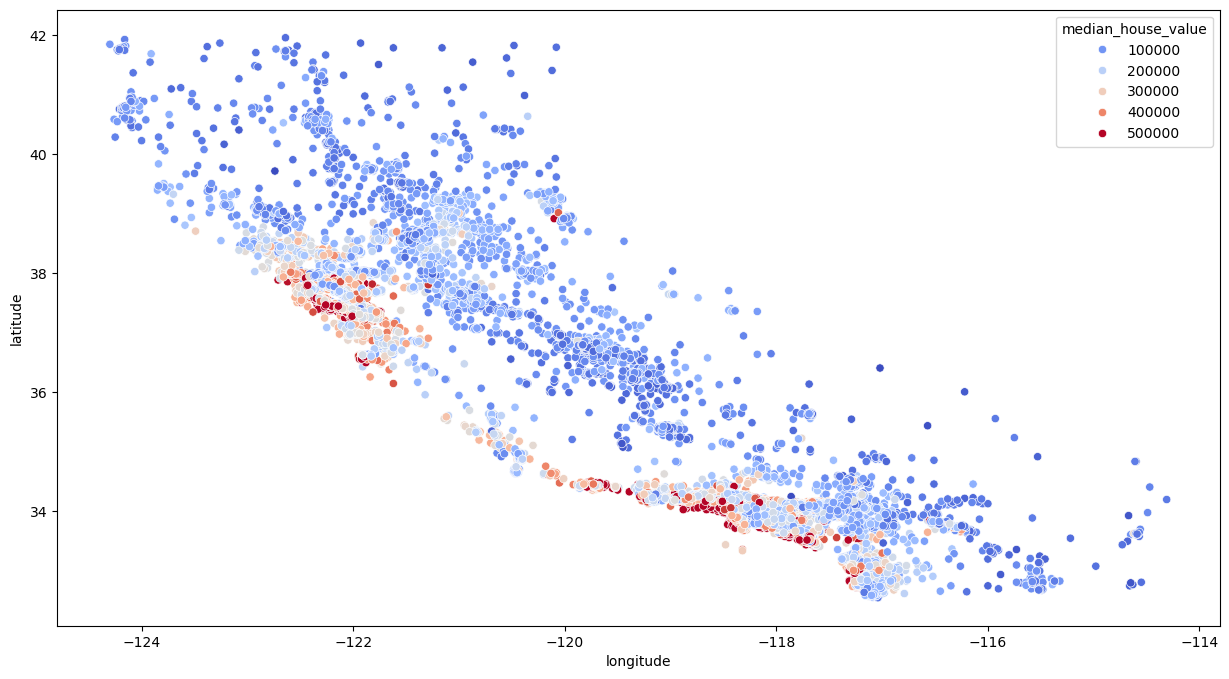

In [229]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="longitude", y="latitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [230]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms']/train_data['households']

<Axes: >

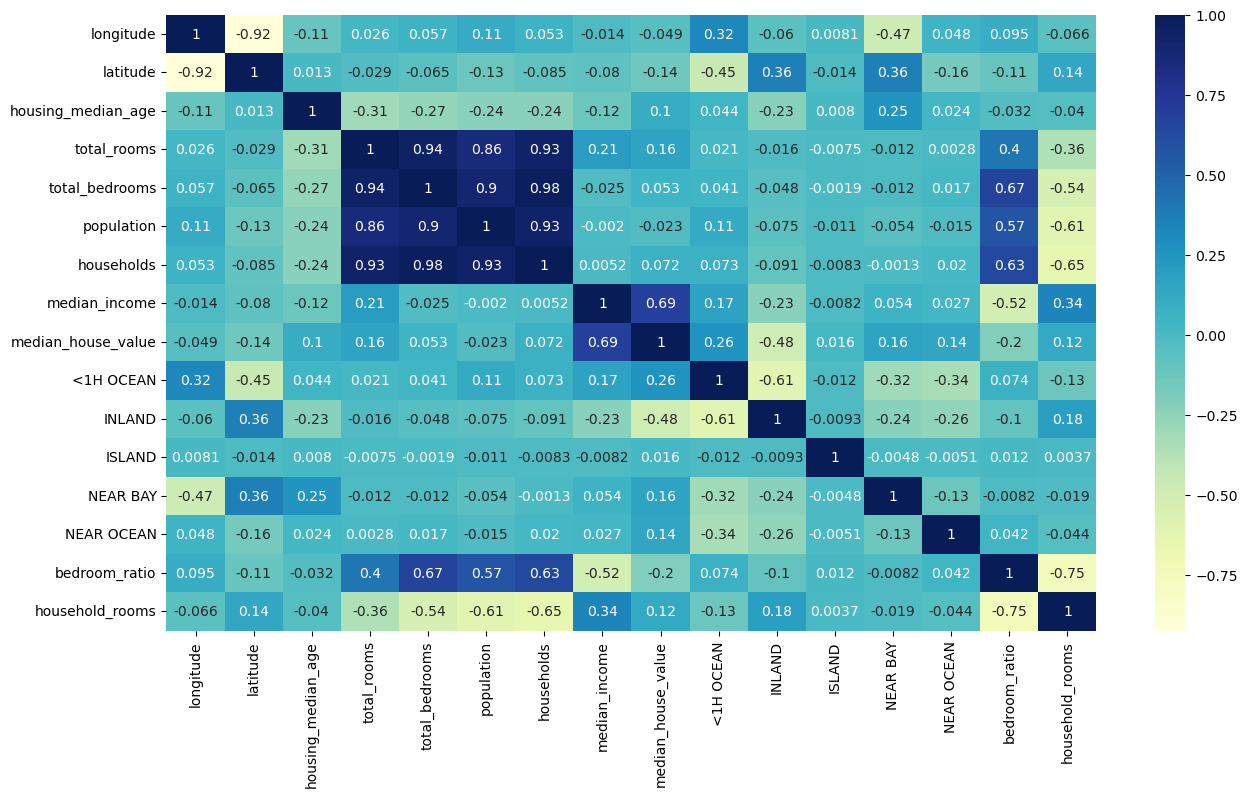

In [231]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [232]:
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

In [233]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'], dtype = int)).drop(['ocean_proximity'],axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms']/test_data['households']


In [234]:
X_test, y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [235]:
regressor.score(X_test,y_test)

0.6653601646850917